# Datasets and Exploratory Visualizations

The dataset is syntherically generated and consists of customers and claim datasets. Here we will load them and do some exploratory visualization.

In [2]:
!pip install --upgrade pip
!pip install seaborn

  Using cached pip-23.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [4]:
!pip install seaborn

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns # Visualization
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

df_claims = pd.read_csv("../data/claims_preprocessed.csv")
df_customers = pd.read_csv("../data/customers_preprocessed.csv")

In [8]:
print(df_claims.isnull().sum().sum())
print(df_customers.isnull().sum().sum())

0
0


There is no null value in this dataset

In [9]:
df_customers.head()

,policy_id,customer_age,customer_education,months_as_customer,policy_deductable,policy_annual_premium,policy_liability,auto_year,num_claims_past_year,num_insurers_past_5_years,customer_gender_male,customer_gender_female,policy_state_ca,policy_state_wa,policy_state_az,policy_state_or,policy_state_nv,policy_state_id
0,1,54,2,381,750,3000,1,2019,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,41,3,31,750,3000,3,2017,0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,57,3,84,750,3000,3,2014,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,74,4,123,750,2600,2,2018,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,39,1,34,750,3000,2,2019,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


([<matplotlib.axis.XTick at 0x7fcd69c2a320>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

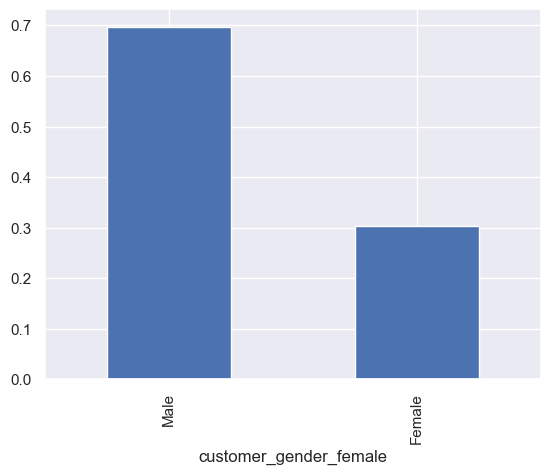

In [10]:
# Plot the bar graph for customer gender

df_customers.customer_gender_female.value_counts(normalize=True).plot.bar()
plt.xticks([0, 1], ["Male", "Female"])

The dataset is heavily weighted towards male customers

In [11]:
df_claims.head()

,policy_id,incident_severity,num_vehicles_involved,num_injuries,num_witnesses,police_report_available,injury_claim,vehicle_claim,total_claim_amount,incident_month,...,incident_type_breakin,incident_type_theft,collision_type_front,collision_type_rear,collision_type_side,collision_type_na,authorities_contacted_police,authorities_contacted_none,authorities_contacted_fire,authorities_contacted_ambulance
0,1,1.0,3,0,2,1.0,0,15000,15000,11,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1.0,2,3,0,0.0,30000,19500,49500,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,0.0,2,0,1,0.0,0,10000,10000,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,0.0,1,0,0,0.0,0,14000,14000,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5,0.0,2,0,2,0.0,0,12000,12000,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   policy_id                        5000 non-null   int64  
 1   incident_severity                5000 non-null   float64
 2   num_vehicles_involved            5000 non-null   int64  
 3   num_injuries                     5000 non-null   int64  
 4   num_witnesses                    5000 non-null   int64  
 5   police_report_available          5000 non-null   float64
 6   injury_claim                     5000 non-null   int64  
 7   vehicle_claim                    5000 non-null   int64  
 8   total_claim_amount               5000 non-null   int64  
 9   incident_month                   5000 non-null   int64  
 10  incident_day                     5000 non-null   int64  
 11  incident_dow                     5000 non-null   int64  
 12  incident_hour       

([<matplotlib.axis.XTick at 0x7fcd69d4cbb0>,
 [Text(0, 0, 'Not Fraud'), Text(1, 0, 'Fraud')])

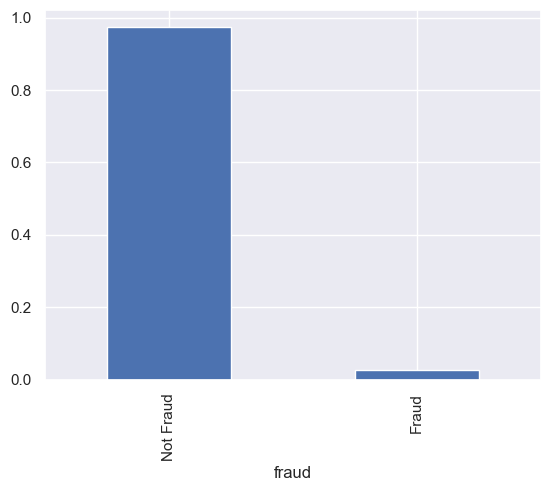

In [18]:
# Plot the bar graph of fradulent claims

df_claims.fraud.value_counts(normalize=True).plot.bar()
plt.xticks([0, 1], ["Not Fraud", "Fraud"])

The overwhemling majority of claims are legitimate (i.e. not fradulent).

Text(0.5, 0, 'Customer Education Level')

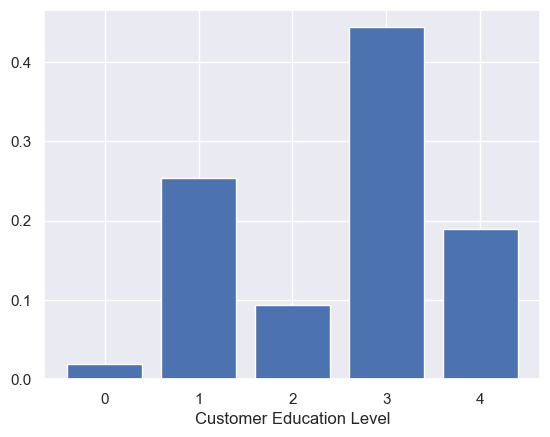

In [23]:
# Plot the Education Categories

educ = df_customers.customer_education.value_counts(normalize=True, sort=False)
plt.bar(educ.index, educ.values)
plt.xlabel("Customer Education Level")

Text(0.5, 0, 'Total Claim Amount')

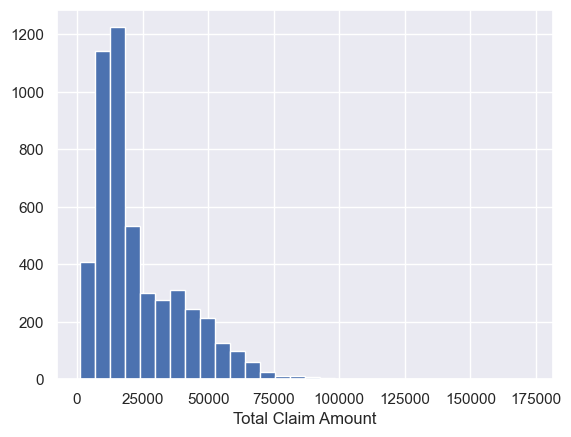

In [27]:
# Plot the total claim amounts
plt.hist(df_claims.total_claim_amount, bins=30)
plt.xlabel("Total Claim Amount")

Majority of the total claim amounts arw under \$25,000

Text(0.5, 0, 'Number of claims per year')

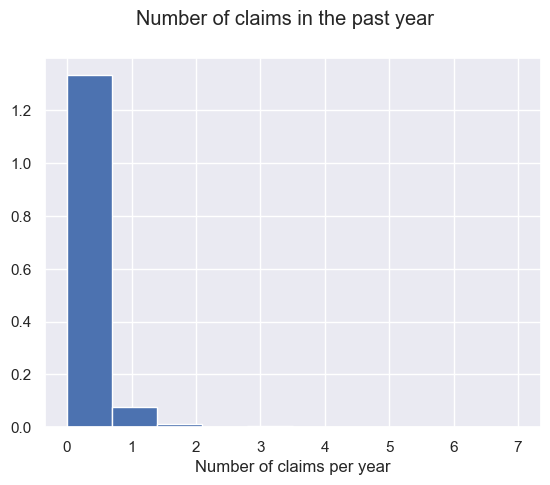

In [31]:
# Plot the number of claims filled in the past year

df_customers.num_claims_past_year.hist(density=True)
plt.suptitle("Number of claims in the past year")
plt.xlabel("Number of claims per year")

In [33]:
df_customers.num_claims_past_year.value_counts()

num_claims_past_year
0    4663
1     266
2      42
3      15
4       7
6       3
7       2
5       2
Name: count, dtype: int64

Most customer did not file any claims in the previous year, but some filled as many as 7 times

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


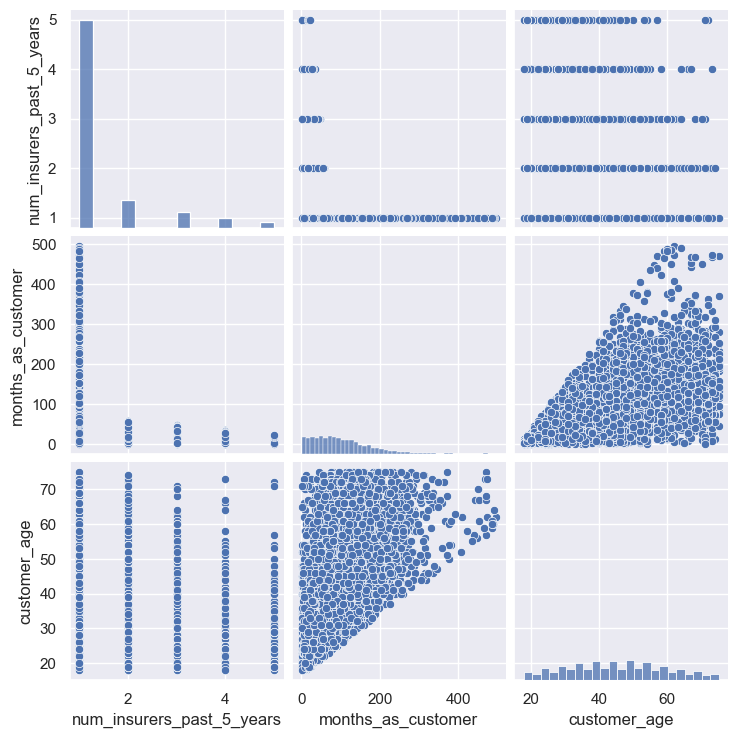

In [35]:
sns.pairplot(
    data = df_customers, vars=["num_insurers_past_5_years", "months_as_customer", "customer_age"]
)

Understandably, the `months_as_customer` and `customer_age` are correlated with each other. A younger person have been driving for a smaller amount of time and therefore have a smaller potential for how long they might have been a customer.

We can also see that `num_insurers_past_5_years` is negatively corelated with `months_as_customer`. If someone frequently jumped around to different insurers, then they probably spent less time as a customer of this insurer.

In [36]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   policy_id                  5000 non-null   int64  
 1   customer_age               5000 non-null   int64  
 2   customer_education         5000 non-null   int64  
 3   months_as_customer         5000 non-null   int64  
 4   policy_deductable          5000 non-null   int64  
 5   policy_annual_premium      5000 non-null   int64  
 6   policy_liability           5000 non-null   int64  
 7   auto_year                  5000 non-null   int64  
 8   num_claims_past_year       5000 non-null   int64  
 9   num_insurers_past_5_years  5000 non-null   int64  
 10  customer_gender_male       5000 non-null   float64
 11  customer_gender_female     5000 non-null   float64
 12  policy_state_ca            5000 non-null   float64
 13  policy_state_wa            5000 non-null   float

In [40]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   policy_id                        5000 non-null   int64  
 1   incident_severity                5000 non-null   float64
 2   num_vehicles_involved            5000 non-null   int64  
 3   num_injuries                     5000 non-null   int64  
 4   num_witnesses                    5000 non-null   int64  
 5   police_report_available          5000 non-null   float64
 6   injury_claim                     5000 non-null   int64  
 7   vehicle_claim                    5000 non-null   int64  
 8   total_claim_amount               5000 non-null   int64  
 9   incident_month                   5000 non-null   int64  
 10  incident_day                     5000 non-null   int64  
 11  incident_dow                     5000 non-null   int64  
 12  incident_hour       

In [38]:
df_customers.head()

,policy_id,customer_age,customer_education,months_as_customer,policy_deductable,policy_annual_premium,policy_liability,auto_year,num_claims_past_year,num_insurers_past_5_years,customer_gender_male,customer_gender_female,policy_state_ca,policy_state_wa,policy_state_az,policy_state_or,policy_state_nv,policy_state_id
0,1,54,2,381,750,3000,1,2019,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,41,3,31,750,3000,3,2017,0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,57,3,84,750,3000,3,2014,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,74,4,123,750,2600,2,2018,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,39,1,34,750,3000,2,2019,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
df_claims.head()

,policy_id,incident_severity,num_vehicles_involved,num_injuries,num_witnesses,police_report_available,injury_claim,vehicle_claim,total_claim_amount,incident_month,...,incident_type_breakin,incident_type_theft,collision_type_front,collision_type_rear,collision_type_side,collision_type_na,authorities_contacted_police,authorities_contacted_none,authorities_contacted_fire,authorities_contacted_ambulance
0,1,1.0,3,0,2,1.0,0,15000,15000,11,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1.0,2,3,0,0.0,30000,19500,49500,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,0.0,2,0,1,0.0,0,10000,10000,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,0.0,1,0,0,0.0,0,14000,14000,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5,0.0,2,0,2,0.0,0,12000,12000,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Fraud is positively correlated with having a great number of insurers over the last 5 years. Customers who switched insurers more frequently also had more prevelance of fraud.

In [47]:
df_combined = df_customers.join(df_claims, on='policy_id', how='left', lsuffix='_left')

In [48]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   policy_id_left                   5000 non-null   int64  
 1   customer_age                     5000 non-null   int64  
 2   customer_education               5000 non-null   int64  
 3   months_as_customer               5000 non-null   int64  
 4   policy_deductable                5000 non-null   int64  
 5   policy_annual_premium            5000 non-null   int64  
 6   policy_liability                 5000 non-null   int64  
 7   auto_year                        5000 non-null   int64  
 8   num_claims_past_year             5000 non-null   int64  
 9   num_insurers_past_5_years        5000 non-null   int64  
 10  customer_gender_male             5000 non-null   float64
 11  customer_gender_female           5000 non-null   float64
 12  policy_state_ca     

<Axes: xlabel='num_insurers_past_5_years', ylabel='fraud'>

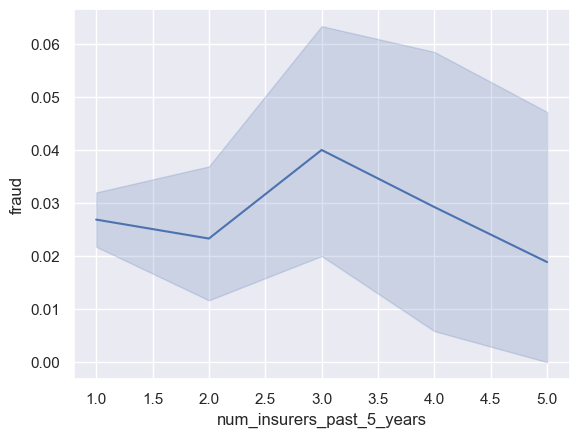

In [49]:
sns.lineplot(x="num_insurers_past_5_years", y="fraud", data=df_combined)

<Axes: xlabel='months_as_customer'>

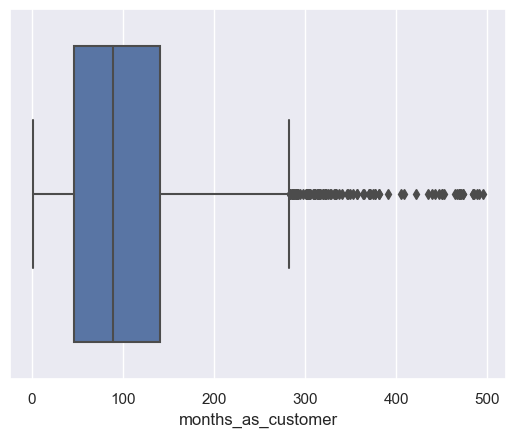

In [51]:
sns.boxplot(x=df_customers["months_as_customer"])

<Axes: xlabel='customer_age'>

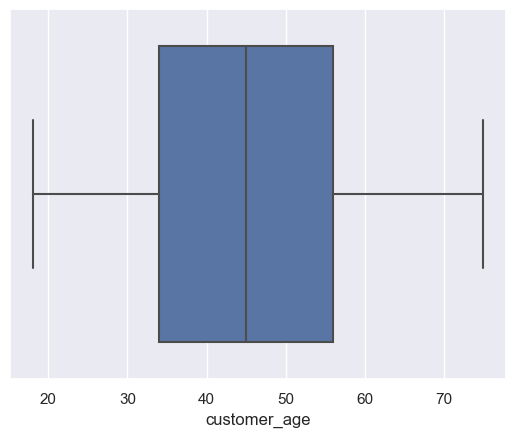

In [52]:
sns.boxplot(x=df_customers["customer_age"])

In [53]:
df_customers["customer_age"].value_counts()

customer_age
48    152
40    133
54    131
43    131
44    123
50    120
39    117
33    116
32    114
46    114
52    112
45    111
53    109
34    109
41    109
42    109
51    107
49    107
37    106
38    105
58    105
36     98
35     97
56     97
31     96
57     94
47     94
55     93
29     89
61     87
24     86
59     86
28     84
30     83
27     82
65     75
26     74
63     73
60     71
25     70
62     68
22     67
68     67
23     66
66     66
20     61
64     59
19     55
67     52
69     50
21     46
71     45
70     44
18     41
72     40
74     36
73     36
75     32
Name: count, dtype: int64

Our customers range from 18 to 75 years old

Text(0.5, 0.98, 'Fraud by Gender')

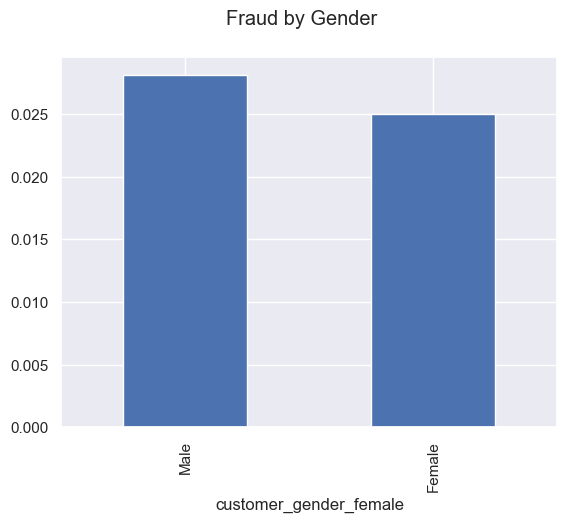

In [60]:
df_combined.groupby("customer_gender_female").mean()["fraud"].plot.bar()
plt.xticks([0, 1], ["Male", "Female"])
plt.suptitle("Fraud by Gender")

Fradulent claims come disproportionately from male customers.

<Axes: >

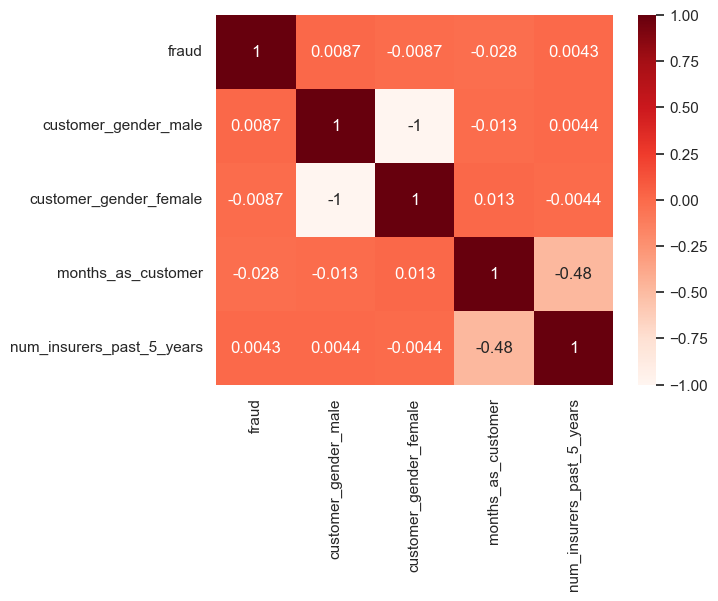

In [63]:
# Creating a correlation matrix of fraud, gender, months as customer, and number of different insurers

cols = [
    "fraud",
    "customer_gender_male",
    "customer_gender_female",
    "months_as_customer",
    "num_insurers_past_5_years"
]

corr = df_combined[cols].corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap="Reds")

Fraud is correlated with having more insurers in the past 5 years, and negatively correlated with being a customer for a longer period of time. These go hand in hand and mean that long time customers are less likely to commit fraud.

## Combined Datasets

We have been looking t the individual datasets, now let's look at their combined view (join)

In [65]:
import pandas as pd

df_combined = pd.read_csv("../data/claims_customer.csv")

In [67]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       20000 non-null  int64  
 1   policy_id                        20000 non-null  int64  
 2   incident_type_theft              20000 non-null  int64  
 3   policy_state_ca                  20000 non-null  int64  
 4   policy_deductable                20000 non-null  int64  
 5   num_witnesses                    20000 non-null  int64  
 6   policy_state_or                  20000 non-null  int64  
 7   incident_month                   20000 non-null  int64  
 8   customer_gender_female           20000 non-null  int64  
 9   num_insurers_past_5_years        20000 non-null  int64  
 10  customer_gender_male             20000 non-null  int64  
 11  total_claim_amount               20000 non-null  float64
 12  authorities_contac

In [69]:
df_combined = df_combined.iloc[:, ~df_combined.columns.str.contains("Unnamed")]

In [70]:
# Get rid of an unwanted column
df_combined.head()

,policy_id,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,policy_state_id,incident_hour,vehicle_claim,fraud,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
0,1675,0,0,750,0,0,2,0,1,0,...,0,20,12000.0,0,0,3000,1,0,0,0
1,9,0,0,750,0,0,9,0,1,1,...,0,15,18500.0,0,1,3000,0,0,0,0
2,1687,0,1,750,0,0,7,1,1,0,...,0,16,17500.0,0,1,3000,0,0,0,0
3,1687,0,1,750,0,0,7,0,1,1,...,0,16,17500.0,0,1,3000,0,0,0,0
4,1692,0,0,750,2,0,6,1,1,0,...,0,8,21500.0,0,1,2800,1,0,0,1


In [71]:
df_combined.describe()

,policy_id,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,policy_state_id,incident_hour,vehicle_claim,fraud,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
count,20000.00000,20000.000000,20000.0000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2500.50000,0.048200,0.6204,751.13000,0.866100,0.070000,6.713200,0.372400,1.412200,0.576500,...,0.02730,11.786800,17426.083700,0.030000,0.857200,2925.400000,0.113600,0.121000,0.220900,0.425400
std,1443.41173,0.214194,0.4853,13.57322,1.097921,0.255153,3.654396,0.483456,0.897291,0.494125,...,0.16296,5.337918,10043.773599,0.170591,0.349878,143.516096,0.317333,0.326135,0.414864,0.494416
min,1.00000,0.000000,0.0000,750.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1000.000000,0.000000,0.000000,2150.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.75000,0.000000,0.0000,750.00000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,...,0.00000,8.000000,10474.250000,0.000000,1.000000,2900.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.50000,0.000000,1.0000,750.00000,0.000000,0.000000,7.000000,0.000000,1.000000,1.000000,...,0.00000,12.000000,15000.000000,0.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,0.000000
75%,3750.25000,0.000000,1.0000,750.00000,2.000000,0.000000,10.000000,1.000000,1.000000,1.000000,...,0.00000,16.000000,22005.500000,0.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,1.000000
max,5000.00000,1.000000,1.0000,1100.00000,5.000000,1.000000,12.000000,1.000000,5.000000,1.000000,...,1.00000,23.000000,51051.000000,1.000000,1.000000,3000.000000,1.000000,1.000000,1.000000,1.000000


Let's explore any unique, missing, or large percentage category in the combined dataset

In [76]:
combined_stats = []

for col in df_combined.columns:
    combined_stats.append(
        (
            col,
            df_combined[col].nunique(),
            df_combined[col].isnull().sum() * 100 / df_combined.shape[0],
            df_combined[col].value_counts(normalize=True, dropna=False).values[0] * 100,
            df_combined[col].dtype
        )
    )
    
stats_df = pd.DataFrame(
    combined_stats,
    columns=["feature", 
             "unique_values",
             "percent_missing",
             "percent_largest_category",
             "datatype"]
)

stats_df.sort_values("percent_largest_category", ascending=True)

,feature,unique_values,percent_missing,percent_largest_category,datatype
0,policy_id,5000,0.0,0.02,int64
24,months_as_customer,387,0.0,0.77,int64
10,total_claim_amount,4978,0.0,1.29,float64
39,vehicle_claim,4621,0.0,1.44,float64
14,customer_age,58,0.0,3.09,int64
12,incident_day,31,0.0,3.79,int64
38,incident_hour,24,0.0,6.87,int64
6,incident_month,12,0.0,10.67,int64
25,auto_year,20,0.0,13.86,int64
19,incident_dow,7,0.0,16.87,int64


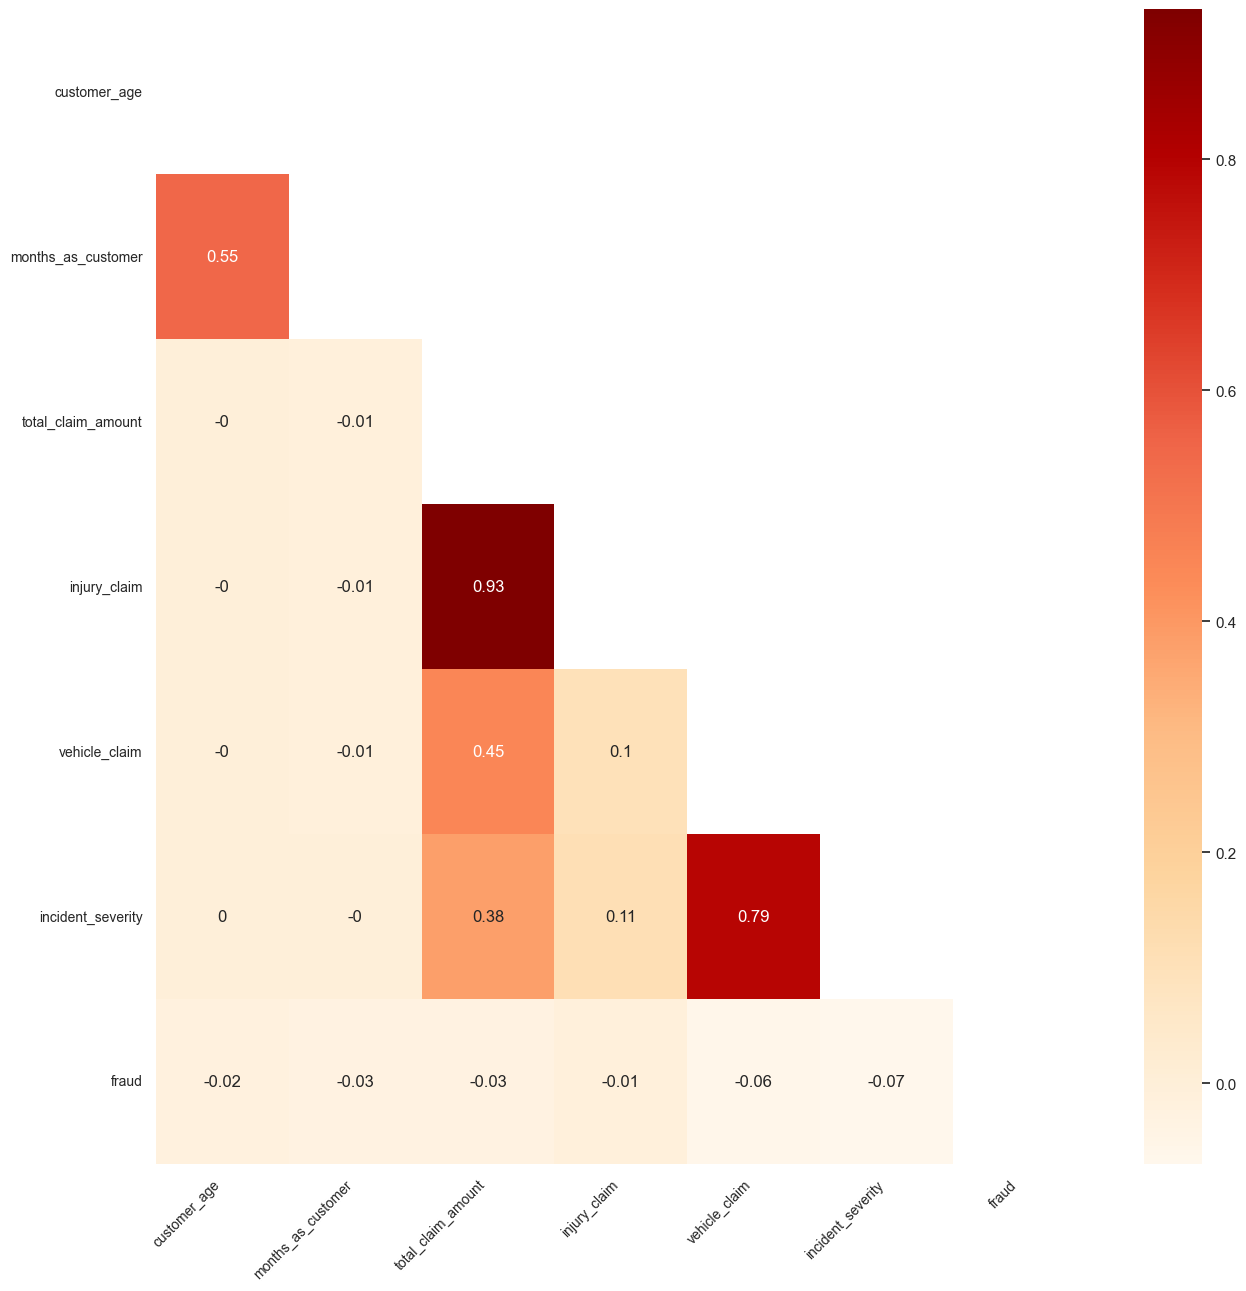

In [80]:
import matplotlib.pyplot as plt
import numpy as np
np.bool = np.bool_

sns.set_style("white")

corr_list = [
    "customer_age",
    "months_as_customer",
    "total_claim_amount",
    "injury_claim",
    "vehicle_claim",
    "incident_severity",
    "fraud"
]

corr_df = df_combined[corr_list]
corr = round(corr_df.corr(), 2)

fix, ax = plt.subplots(figsize=(15, 15))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap="OrRd")

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha="right", rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

plt.show()